In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Old Data

In [2]:
sujets = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']

with open('parametre/Delete/Delete_list_trials_velocity_fct.pkl', 'rb') as fichier :
    delete = pickle.load(fichier, encoding='latin1')
    
with open('parametre/Delete/Delete_list_Bad_trials_velocity.pkl', 'rb') as fichier :
    Bad = pickle.load(fichier, encoding='latin1')

relative_error_good = {'steady_state':[], 'latency':[], 'tau':[]} # , 'a_anti':[], 'start_anti':[]
relative_error_bad = {'steady_state':[], 'latency':[], 'tau':[]} # , 'a_anti':[], 'start_anti':[]

for s in sujets :
    with open('parametre/fct_velocity/param_Fit_%s_fct_velocity.pkl'%s, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
                   
    for b in range(param['N_blocks']) :
        for t in range(param['N_trials']) :
            for p in relative_error_good.keys() :

                param_ = param['fit_values'][b][t]
                
                try : relative_error = abs((param_[p].stderr / param_[p].value) *100)
                except : relative_error = np.nan
                if not relative_error : relative_error = np.nan
                
                if abs(relative_error)<200:
                    if t in Bad[s][b] or t in delete[s][b] :
                        relative_error_bad[p].append(relative_error)
                    else :
                        relative_error_good[p].append(relative_error)
                else :
                    if not np.isnan(relative_error) :
                        print(s, b, t, p, '%.3f'%relative_error, '\t\tBad =', t in Bad[s][b] or t in delete[s][b])

DC 0 170 tau 320.724 		Bad = False
DC 1 101 tau 532.012 		Bad = False
DC 2 14 tau 248.194 		Bad = False
DC 2 85 tau 252.436 		Bad = False
FM 0 92 tau 216.502 		Bad = False
FM 0 167 tau 296.547 		Bad = True
FM 1 172 tau 384.744 		Bad = False
FM 2 120 tau 224.374 		Bad = False
LB 0 82 tau 4285.822 		Bad = True
LB 1 85 tau 517.279 		Bad = True
OP 0 48 tau 899.583 		Bad = False
OP 1 135 tau 296.033 		Bad = True
RS 1 92 tau 200.399 		Bad = False
RS 1 105 steady_state 424.940 		Bad = False
RS 1 105 tau 2991.950 		Bad = False
RS 2 24 tau 207.859 		Bad = False
RS 2 61 steady_state 235.174 		Bad = False
RS 2 85 tau 215.559 		Bad = True
RS 2 127 tau 206.773 		Bad = False
SR 0 137 tau 703.044 		Bad = True
SR 0 159 tau 715.855 		Bad = False
SR 2 7 tau 201.729 		Bad = False
TN 0 119 tau 494.965 		Bad = False
TN 2 97 latency 394.861 		Bad = True
TN 2 97 tau 2305.164 		Bad = True
YK 0 70 tau 234.035 		Bad = True
YK 0 71 tau 716.593 		Bad = True
YK 0 75 steady_state 407.027 		Bad = True
YK 0 76 steady

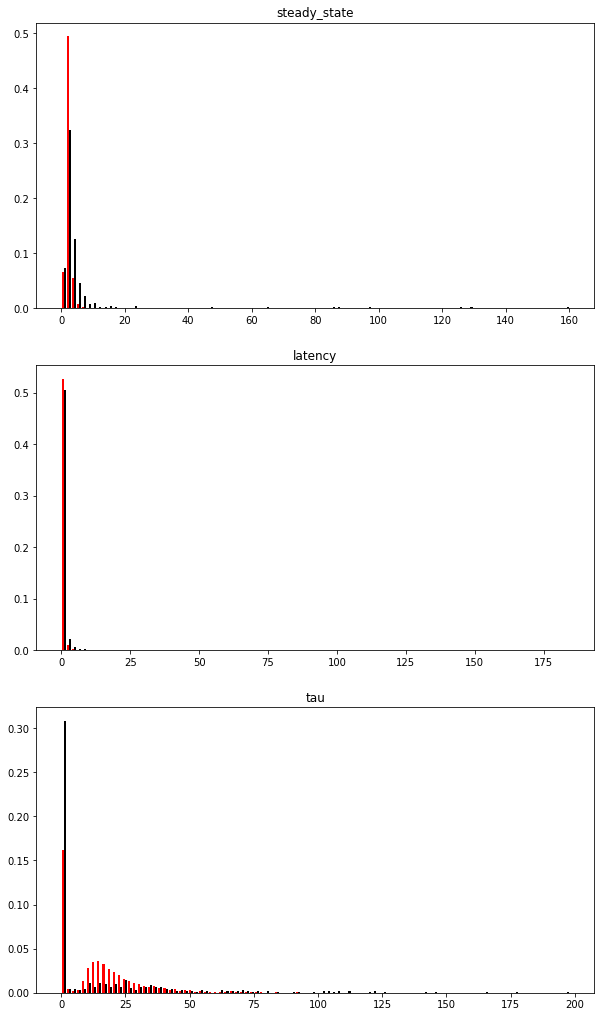

In [3]:
nb_param = len(relative_error_good.keys())
fig, ax = plt.subplots(nb_param, 1, figsize=(10,10*nb_param/1.681))
for num_p, p in enumerate(relative_error_good.keys()) :
    ax[num_p].hist([relative_error_good[p], relative_error_bad[p]],
                   color=['r', 'k'], density=True, bins=100)#, histtype='step', align='mid')
    
    ax[num_p].set_title(p)
    #ax[num_p].set_ylim(0,1)

# New Data

In [4]:
relative_error_good = {'steady_state':[], 'latency':[], 'tau':[]} # , 'a_anti':[], 'start_anti':[]
relative_error_bad = {'steady_state':[], 'latency':[], 'tau':[]} # , 'a_anti':[], 'start_anti':[]

sujet = np.arange(1, 20)
sujet = np.delete(sujet, 8)
sujet = np.delete(sujet, 12)

for s in sujet :
    with open('parametre/new_data/fct_velocity/param_Fit_s%sBL50_fct_velocity.pkl'%s, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    f = open('data/new_data/s%sBL50_errors.txt'%s, 'r')
    delete = f.read()
    delete = [int(x) for x in delete if x!='\n']
    
    for t in range(len(delete)):#param['N_trials']) :
        
        for p in relative_error_good.keys() :
            
            param_ = param['fit_values'][0][t]
            
            
            try : relative_error = abs((param_[p].stderr / param_[p].value) *100)
            except : relative_error = np.nan
            if not relative_error : relative_error = np.nan
            
            
            if abs(relative_error)<200:
                if delete[t] == 1 : relative_error_bad[p].append(relative_error)
                else :              relative_error_good[p].append(relative_error)
            else :
                if not np.isnan(relative_error) :
                    print(s, b, t, p, '%.3f'%relative_error, '\t\tBad =', delete[t] == 1)

2 2 46 tau 211.196 		Bad = False
2 2 89 tau 287.678 		Bad = False
2 2 269 tau 200.672 		Bad = False
2 2 337 tau 200.496 		Bad = False
3 2 71 tau 587.457 		Bad = False
3 2 233 tau 207.792 		Bad = True
3 2 287 tau 245.275 		Bad = False
3 2 314 tau 221.650 		Bad = False
3 2 356 tau 839.637 		Bad = False
3 2 375 tau 226.285 		Bad = False
4 2 11 tau 310.206 		Bad = False
4 2 49 steady_state 408.990 		Bad = True
4 2 49 tau 6195.213 		Bad = True
4 2 85 steady_state 358.054 		Bad = True
4 2 238 steady_state 238.729 		Bad = False
6 2 112 steady_state 318.028 		Bad = False
6 2 112 tau 4782.270 		Bad = False
6 2 185 tau 1724.314 		Bad = False
6 2 206 steady_state 315.171 		Bad = False
6 2 206 tau 4440.843 		Bad = False
6 2 353 steady_state 203.343 		Bad = False
6 2 353 tau 2206.152 		Bad = False
7 2 38 steady_state 291.866 		Bad = False
7 2 38 tau 2265.743 		Bad = False
7 2 162 steady_state 1082.055 		Bad = False
7 2 162 latency 519.505 		Bad = False
7 2 162 tau 12848.743 		Bad = False
7 2 200 st

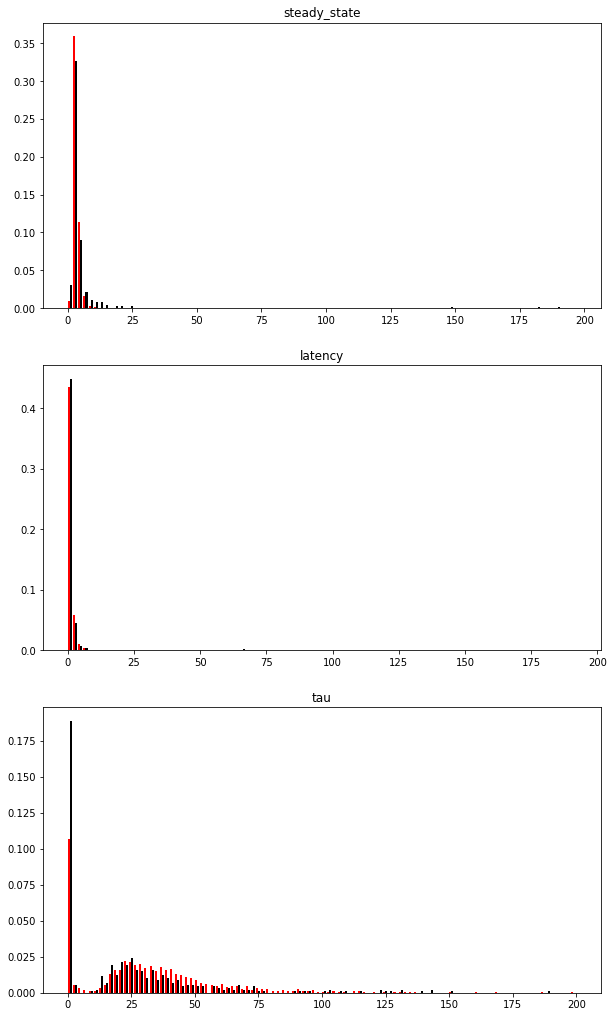

In [5]:
nb_param = len(relative_error_good.keys())
fig, ax = plt.subplots(nb_param, 1, figsize=(10,10*nb_param/1.681))
for num_p, p in enumerate(relative_error_good.keys()) :
    ax[num_p].hist((relative_error_good[p], relative_error_bad[p]),
                   density=True, color=('r', 'k'), bins=100)
    ax[num_p].set_title(p)